In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imports import *
from datetime import datetime, timedelta
import staircase as sc
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)

vsteps = Steps.read_dataframe(df,'enter','leave')
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)


<AxesSubplot:>

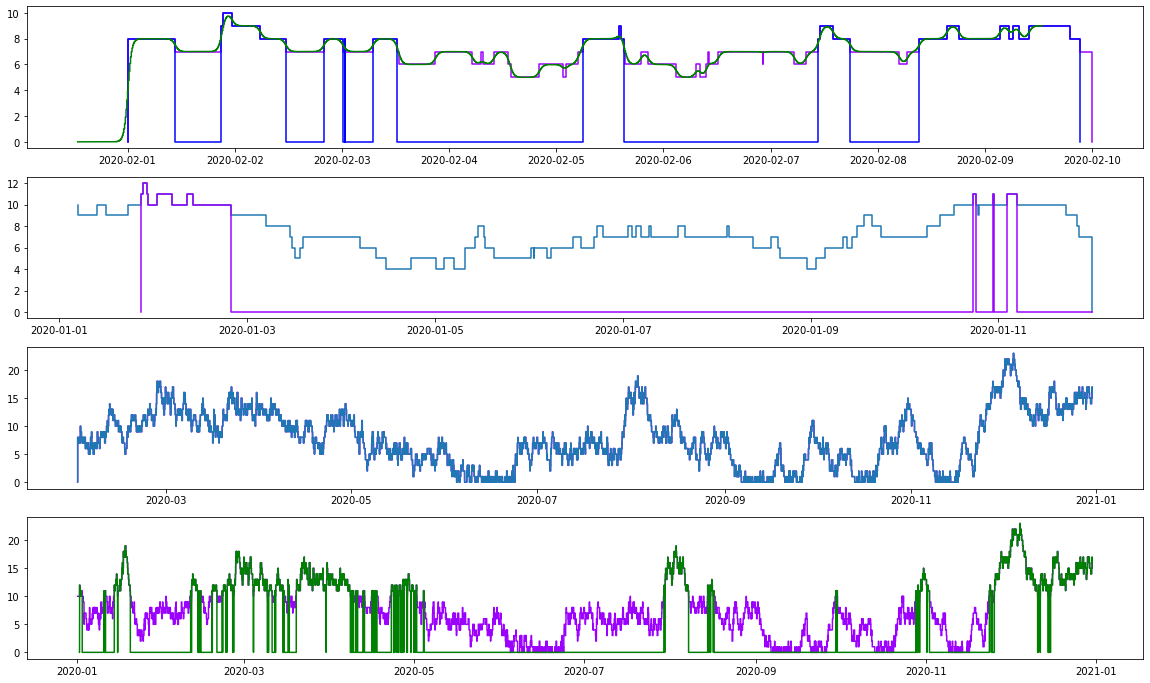

In [3]:
#tbase = Basis(Basis.tanh,52416)

p = np.arange(pd.Timestamp(2020,1,31), pd.Timestamp(2020,2,4), pd.Timedelta(minutes=1)).astype(pd.Timestamp)
px = [x.timestamp() for x in p]
fig,ax = plt.subplots(nrows=4,figsize=(20,12))

#vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,2,3)).plot(ax=ax[0])
v_ul_clip = vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,2,10))
v_ul_clip.plot(ax=ax[0])
(v_ul_clip>=8).plot(ax=ax[0],color='blue')
(v_ul_clip<<pd.Timedelta(hours=11)).smooth_plot(ax=ax[0],color='g')
#v_ul_clip.smooth_plot(ax=ax[0],color='g')
#(v_ul_clip).smooth_plot(ax=ax[0],color='r')
first_step = (v_ul_clip.steps())[0]
#first_step_full = (vsteps.steps())[0]
#(v_ul_clip.steps())[0].plot(ax=ax[0],color='blue')
#ax[0].step(p,first_step(p),color='blue')
#ax[0].step(p,(v_ul_clip<<timedelta(minutes=660))(p),color='g')

#queue.clip(lower=pd.Timestamp(2020,2,1),upper=pd.Timestamp(2020,3,1)).plot(ax[0])

queue.clip(upper=pd.Timestamp(2020,1,12)).plot(ax[1])
(vsteps>10).clip(ubound=pd.Timestamp(2020,1,12)).plot(ax=ax[1])


vsteps.clip(lbound=pd.Timestamp(2020,2,1)).plot(ax=ax[2])
queue.clip(lower=pd.Timestamp(2020,2,1)).plot(ax[2])

(vsteps).plot(ax=ax[3])
#(vsteps).smooth_plot(ax=ax[3],color='r')
#(vsteps>>pd.Timedelta(hours=11)).plot(method='function',ax=ax[3],color='g')
(vsteps>10).plot(ax=ax[3],color='g')

#print((v_ul_clip<<timedelta(minutes=660))(datetime(2020,2,1,6,0)))
#ax[2].step(np.arange(len(vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])),vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])

# print(queue.clip(lower=pd.Timestamp(2020,2,1),upper=pd.Timestamp(2020,3,1)).mean())
# print((vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,3,1))).mean())

# print(queue.clip(upper=pd.Timestamp(2020,3,1)).mean())
# print((vsteps.clip(ubound=pd.Timestamp(2020,3,1))).mean())

# print(queue.clip(lower=pd.Timestamp(2020,2,1)).mean())
# print(vsteps.clip(lbound=pd.Timestamp(2020,2,1)).mean())


In [ ]:
n = datetime.now()
n

In [ ]:
v_ul_clip_dict = v_ul_clip.to_dict(False)
fkey = v_ul_clip_dict.keys()[0]
fkey_utc = fkey.tz_localize('UTC')
print(fkey_utc)
print(pd.Timestamp.utcfromtimestamp(fkey.timestamp()))
print(fkey)
print(v_ul_clip.steps()[0])

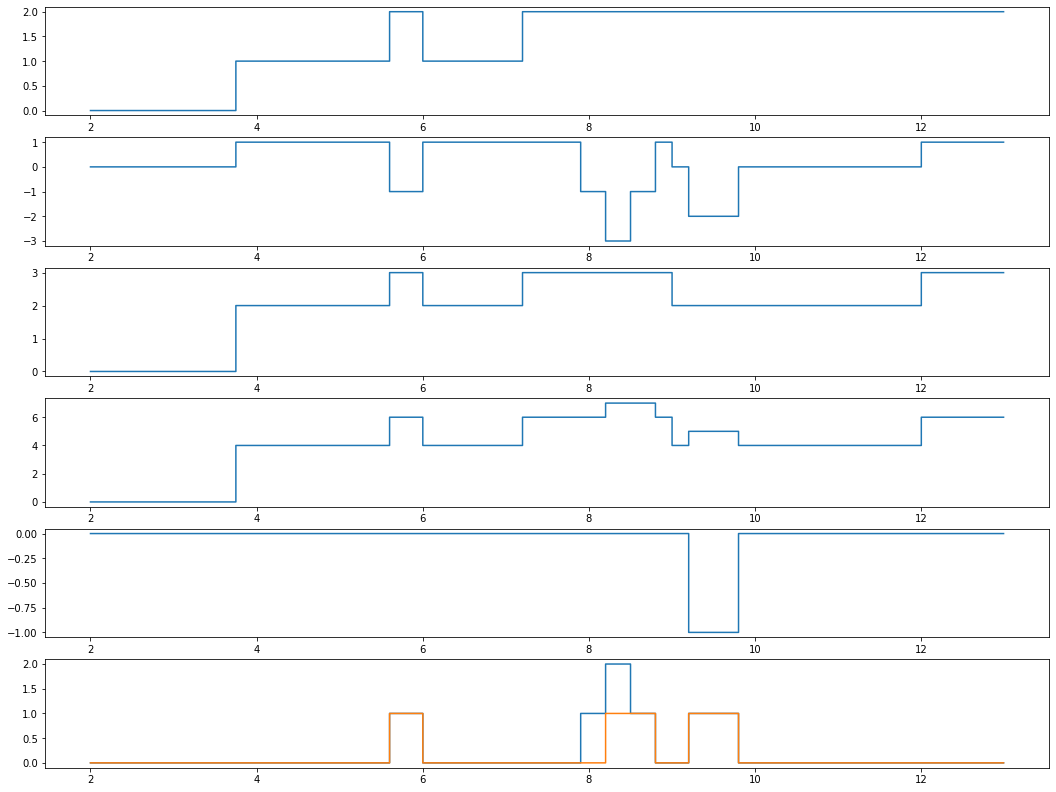

In [4]:

#mbase = np.frompyfunc(mybase2,1,1)
tbase = Basis(Basis.sigmoid,5)


x = Step(3.75)
y = Step(5.6,6)
y2 = Step(8.2,8.8)
y3 = Step(9.2,9.8)

#y3.rebase()
z = Step(7.2)
q = Step(12)

p = Step(9,weight=-1)
p1 = Step(9.5,weight=-1)

ss1 = Steps()
ss1 = ss1.add([z,x,y])

ss2 = Steps()
ss2 = ss2.add([q,x,p])

s1 = sc.Stairs()
s1.layer(4)
s1.layer(5,6)
s1.layer(4)
s1.layer(7)
s1.layer(12)
s1.layer(9,value=-1)

ss3 = Steps().add([Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

y4 = y2 << 0.3
ss3 = ss2 + ss1
ss4 = ss3+y2
ss4 += y3

ss5 = Steps().add([y2,y3])

yy =  y+y2+y3 + y4
#yy -=ss2
#yy.rebase(Basis(Basis.logit))
#ss4.rebase(tbase)
    
p = np.arange(2,13,0.01)

fig,ax = plt.subplots(nrows=6,figsize=(18,14))

ax[0].step(p,ss1[p])
ax[1].step(p,(ss2-yy-yy).step(p))
ax[2].step(p,ss3.step(p))
#s1.plot(ax[2],color='r')
ax[3].step(p,(ss4+ss3).step(p))
#ax[3].step(p,(ss4 > 0).step(p))
#ax[3].step(p,(ss4 > 2).step_function(p),color='r')
#ax[5].step(p,ss5.step_function(p))
#ax[5].step(p,(y4 << 4).step(p))
#ax[5].step(p,y4[p])
ax[5].step(p,yy.step(p))
ax[5].step(p,(yy-y4).step(p))

ax[4].step(p,y3.reflect().step(p))
#print(y4[10:13:0.2])
#print((y4)[10])

In [ ]:
import altair as alt

def createplot(smooth=True):    
    if smooth:
        source = pd.DataFrame({"x": p, "y": ss4.smooth_step(p,0.0005)})

        aplot = alt.Chart(source).mark_line(interpolate='step-before').encode(
            x='x',
            y='y',
            color=alt.value('red')
        )
        return aplot
    else:
        source = pd.DataFrame({"x": p, "y": ss4.step(p)})

        aplot = alt.Chart(source).mark_line(interpolate='step-before').encode(
            x='x',
            y='y',
            color=alt.value('blue')
        )
        return aplot        
    


smooth_steps = createplot()
steps = createplot(False)

alt.layer(
    smooth_steps,
    steps
).resolve_scale(color='independent').properties(width=1000,height=300).interactive()

#(smooth_steps + steps).properties(width=1000,height=300).interactive()

In [ ]:


fig, ax = plt.subplots(figsize=(16,8))

plt.step(p,ss1.step(p),label = "s1")
plt.step(p,ss2.step(p),label = "s2", linestyle="--", linewidth=3)
plt.step(p,ss3.step(p),label = "s3", linestyle="-", linewidth=2)
ax.legend()
plt.show()


In [ ]:
k = np.arange(1,5,None)
k

In [ ]:
x = Step(pd.Timestamp(2020,1,1,15,12))
y = Step(pd.Timestamp(2020,1,1,11,1))
z = Step(pd.Timestamp(2020,1,1,9,25))

na = np.array([x,y,z])
na

In [ ]:
fna = na[np.where(na > pd.Timestamp(2020,1,1,10))]
fna

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

p = np.arange(-2,5,0.5)

x = np.array([p]*3)
w = np.ones(3)
s = np.array([0.5,1,1.5])
#n = np.subtract(x,s)
plt.step(p,np.dot(np.heaviside(x.transpose() - s,1),w))


In [ ]:
p = np.arange(pd.Timestamp(2020,1,1,11), pd.Timestamp(2020,2,1), pd.Timedelta(minutes=1)).astype(pd.Timestamp)
pf = np.array([t.timestamp() for t in p])
pf[int(len(pf)/1.2)]

In [ ]:
s = [1579156200.0,1579596000.0,1580035800.0]

f = np.where(pf >= 1579156200.0, 1,0)
f = np.where(pf >= 1579156200.0, 1,0)
f2 = np.where(pf >= 1579596000.0, 1,0)
f3 = np.where(pf >= 1580035800.0, 1,0)

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
plt.step(p,np.sum([f,f2,f3],axis=0))

In [ ]:
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')

x.sum(axis=1)

In [ ]:
#[2, 3, 1, 2, 1, 2]
#[3.75, 5.6, 6, 7.2, 9, 12]

s1 = sc.Stairs()
s1.layer(4)
s1.layer(4)
s1.layer(5,6)
s1.layer(7)
s1.layer(12)
s1.layer(9,value=-1)

ss3 = Steps().add([Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

s = Step(4,weight=2)
tbase = Basis(Basis.logit,1)
ss3.rebase()
#print(s.integrate(10,0))
print(Analysis.mean_integrate2(ss3))
#print(list(ss3._cummulative.keys()))

print(s1.integrate())

In [ ]:
# widths = np.subtract(cumulative.keys()[2:], cumulative.keys()[1:-1])
# heights = cumulative.values()[1:-1]
# area = np.multiply(widths, heights).sum()

# dd = vsteps._steps
# dcs = vsteps._cumsum
# ddk = [d.start_ts for d in dd]
# #ddv = [d. for d in dd]

# delta = np.subtract(ddk[2:],ddk[1:-1])

# #print(delta)
# #print(dcs)
# np.dot(dcs[1:-1],delta)/3600

vsteps.percentile(35)

In [ ]:
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
queue.percentile(35)